# Indian Stock Price Prediction Using market and news data Analysis

Objective: Create an ensembled machine learning model for stock price/performance prediction by combining historical stock prices, and sentimental analysis of news headlines, to see the impact of news headlines on the Indian stock market.

Here We are analyzing and predicting the stocks of National STOCK EXCHANGE i.e. Nifty50 (NSE Nifty)

## Loading the Package

> Loading all the important packages for analyzing and predicting alonng with plotting graph



In [3]:
!pip install numpy==1.24.3
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 112.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.20.1 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
langchain 0.3.19 requires numpy<2,>=1.26.4; python_version < "3.12", but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.0 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima

import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt  #Altair is a declarative statistical visualization library for Python

import statsmodels.api as sm

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import adfuller

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Part A : Numerical Analysis Using Stock Market Data

Here We will extracting the data of **National Stock Exchange** from yahoo finance through **Python API**

So we are installing the PYPI yfinance

In [3]:
# installing pypi package for yahoo finance


!pip install yfinance --upgrade --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.54
    Uninstalling yfinance-0.2.54:
      Successfully uninstalled yfinance-0.2.54


In [4]:
import yfinance as yf

### Step 1 : Extracting the NSE Data from Yahoo Finance API

> We are extracting the data of **National Stock Exchange** from **1st Jan 2001 to 30th June 2023**(As for news analysis we have data *till 30th June 2023*)





In [206]:
nse_data1 = yf.download('^NSEI',start = '2001-01-01',end = '2023-06-30')
nse_data1.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


In [113]:
nse_data = nse_data1

In [114]:
nse_data.reset_index(inplace=True)

In [115]:
nse_data.head(1)

Price,Date,Close,High,Low,Open,Volume
Ticker,,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
0,2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0


In [116]:
nse_data.columns = nse_data.columns.droplevel(1)

In [117]:
nse_data.tail()

Price,Date,Close,High,Low,Open,Volume
3863,2023-06-22,18771.250000,18886.599609,18759.500000,18853.599609,252700
3864,2023-06-23,18665.500000,18756.400391,18647.099609,18741.849609,210600
3865,2023-06-26,18691.199219,18722.050781,18646.699219,18682.349609,171300
3866,2023-06-27,18817.400391,18829.250000,18714.250000,18748.550781,222500
3867,2023-06-28,18972.099609,19011.250000,18861.349609,18908.150391,398800


In [118]:
nse_data.shape

(3868, 6)

In [119]:
nse_data.size

23208

In [120]:
nse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868 entries, 0 to 3867
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3868 non-null   datetime64[ns]
 1   Close   3868 non-null   float64       
 2   High    3868 non-null   float64       
 3   Low     3868 non-null   float64       
 4   Open    3868 non-null   float64       
 5   Volume  3868 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 181.4 KB


In [121]:
nse_data.isnull().sum()

,0
Price,
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


Formatted the Date column with datetime

In [124]:
nse_data['Date'] = pd.to_datetime(nse_data['Date'])

In [125]:
nse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868 entries, 0 to 3867
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3868 non-null   datetime64[ns]
 1   Close   3868 non-null   float64       
 2   High    3868 non-null   float64       
 3   Low     3868 non-null   float64       
 4   Open    3868 non-null   float64       
 5   Volume  3868 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 181.4 KB


### Step 2 : Cheking the weekly moving average of Close Data

In [126]:
def nse_stock_weekly_moving_avg(weeks,df):
  close_data = pd.DataFrame({'date': df['Date'] , 'close': df['Close']})
  close_data.set_index('date',inplace=True)
  num = weeks * 5
  close_data['moving_avg'] = close_data['close'].rolling(window = num).mean().shift()
  return close_data.dropna()

In [127]:
nse_stock_weekly_moving_avg(4,nse_data).head()

,close,moving_avg
date,,
2007-10-16,5668.049805,5067.165015
2007-10-17,5559.299805,5125.835010
2007-10-18,5351.000000,5176.489990
2007-10-19,5215.299805,5207.422485
2007-10-22,5184.000000,5230.809985


<Axes: xlabel='date'>

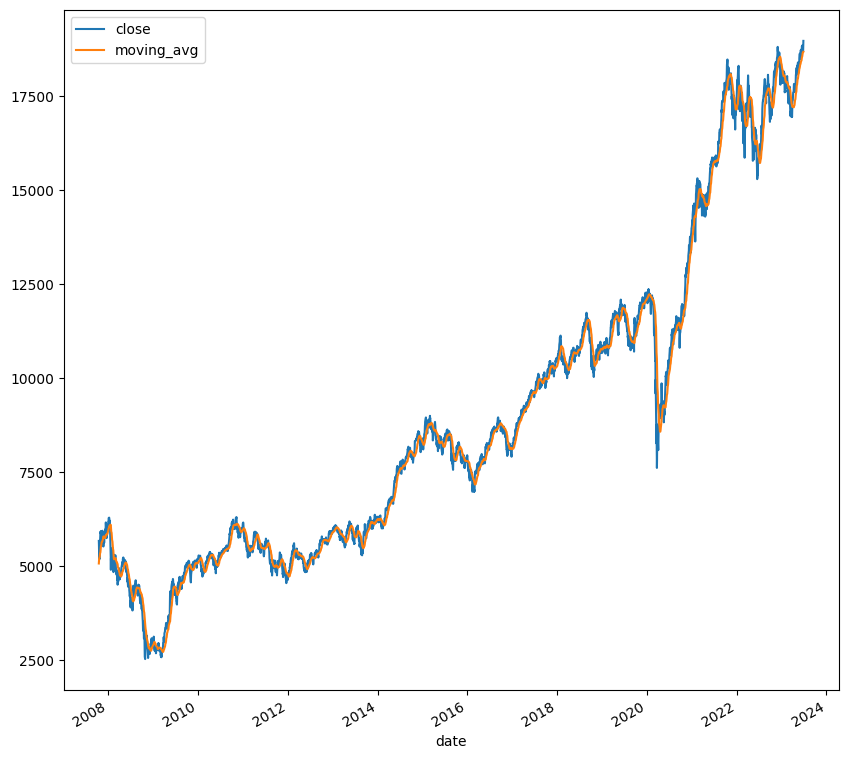

In [128]:
nse_stock_weekly_moving_avg(4,nse_data).plot()

Text(0, 0.5, 'Close')

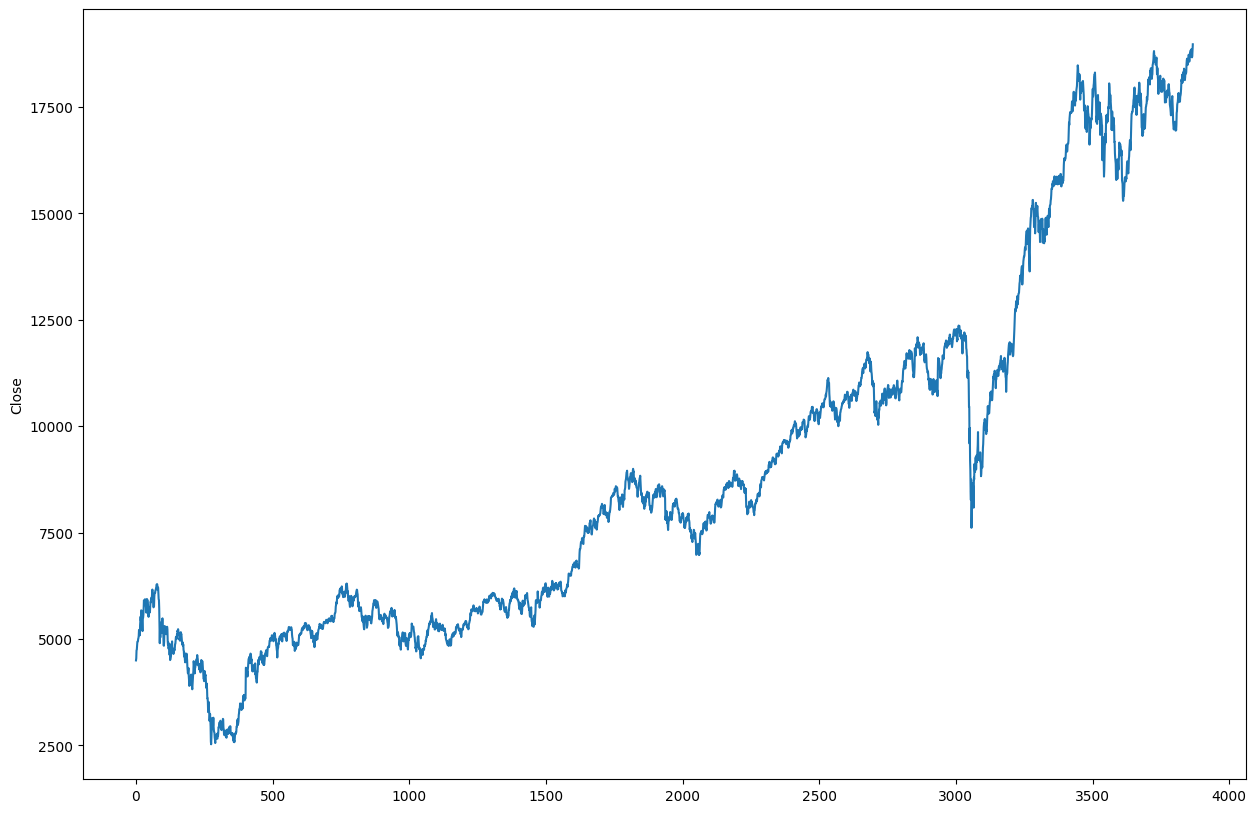

In [129]:
plt.figure(figsize=(15, 10))
nse_data['Close'].plot()
plt.ylabel('Close')

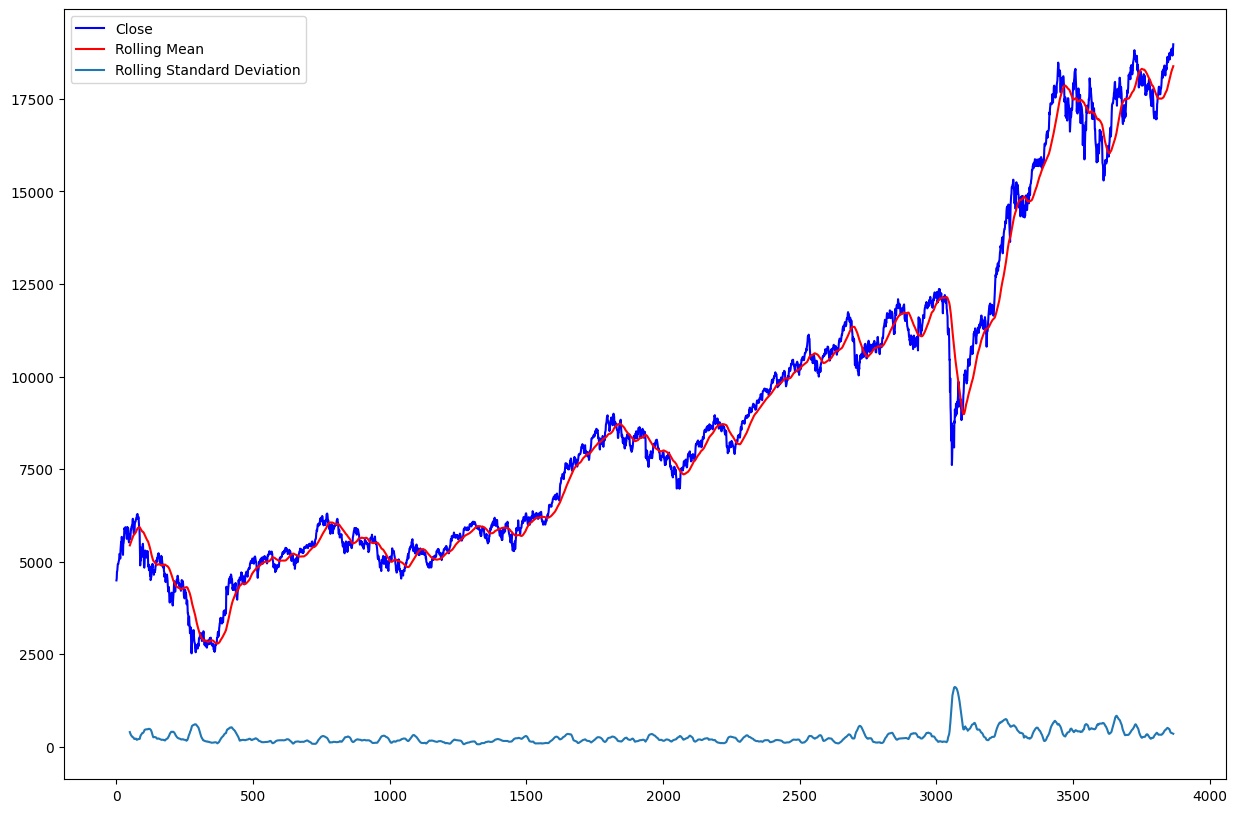

In [130]:
#Plotting moving average for window 50
nse_close = nse_data['Close']
ma_50 = nse_close.rolling(window = 50).mean()
std_50 = nse_close.rolling(window = 50).std()

plt.figure(figsize=(15, 10))
nse_data['Close'].plot(color = 'b', label = 'Close')
ma_50.plot(color = 'r', label = 'Rolling Mean')
std_50.plot(label = 'Rolling Standard Deviation')
plt.legend()

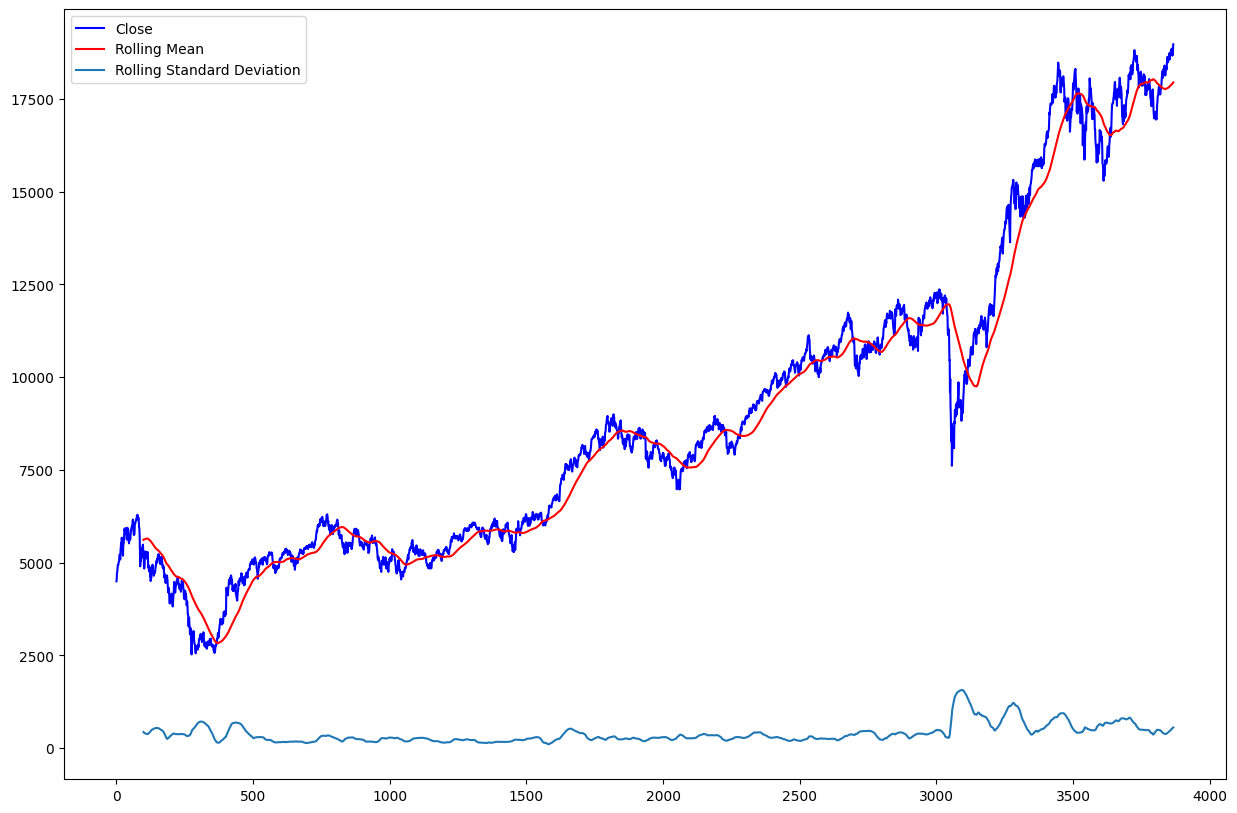

In [131]:
#Plotting moving average for window 100
nse_close = nse_data['Close']
ma_100 = nse_close.rolling(window = 100).mean()
std_100 = nse_close.rolling(window = 100).std()

plt.figure(figsize=(15, 10))
nse_data['Close'].plot(color = 'b', label = 'Close')
ma_100.plot(color = 'r', label = 'Rolling Mean')
std_100.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

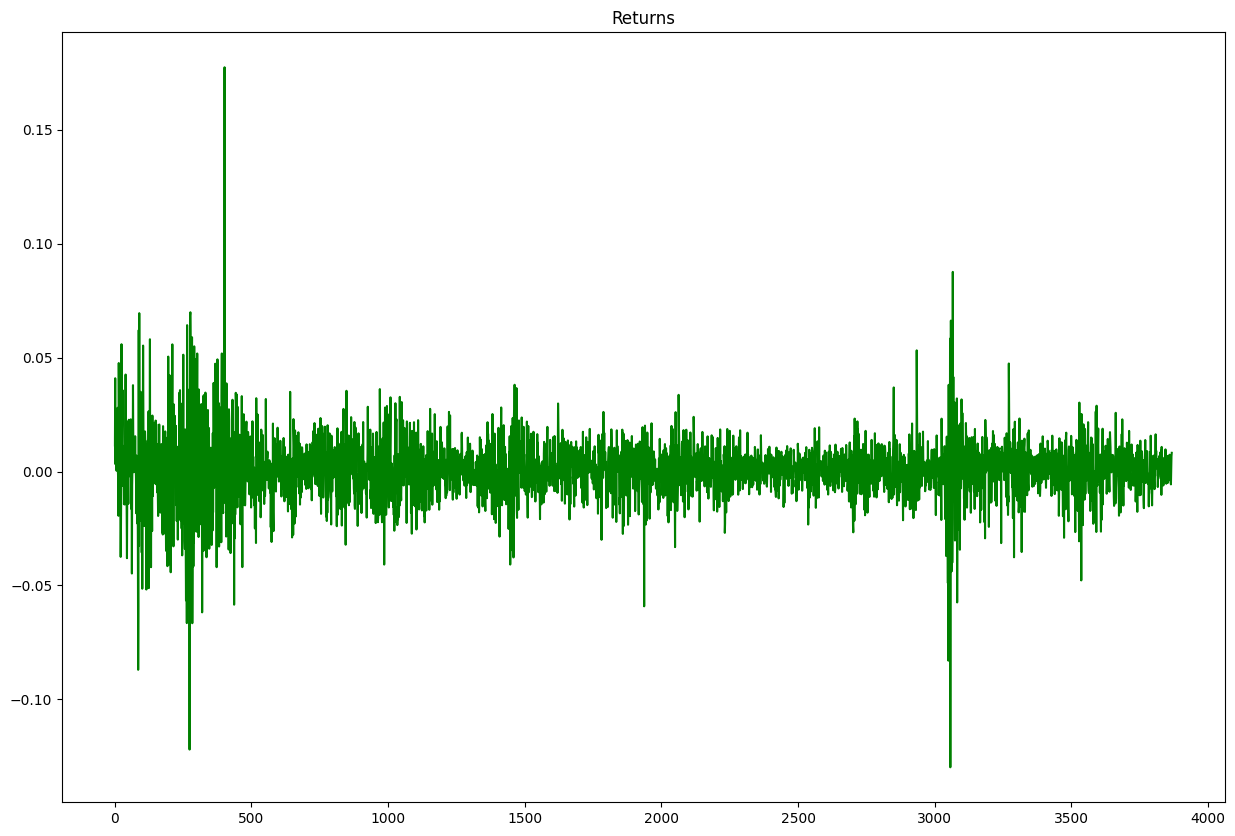

In [132]:
# Plotting return

nse_returns =  nse_close/nse_close.shift(1) - 1

plt.figure(figsize=(15, 10))

nse_returns.plot(label='Return' , color = 'green')

plt.title('Returns')

### Step 3 : Numerical Analysis using Rolling Average and Standard Deviation

We will perform 80:20 of the nse_data for train and test



*   train = 80%
*   test = 20%




In [152]:
nse_train = nse_data[:3290]
nse_test = nse_data[3290:]

#### a. Normal nse Tran Close Data

Creating new function for calculating rolling mean and standard deviation

In the same function we are also testing the Stationary of the time series by using **Dickey Fuller Test**

In [153]:
def test_stationary(timeseries):
  rolmean = timeseries.rolling(30).mean() #We are using 30 days window for rolling mean
  rolstd = timeseries.rolling(30).std() #We are using 30 days window for rolling standard

  plt.figure(figsize = (15,10))
  plt.plot(timeseries,color = 'y',label = 'original',linewidth=5.0)
  plt.plot(rolmean,color='r',label = 'rolling mean')
  plt.plot(rolstd,color = 'b',label = 'rolling standard')
  plt.xlabel('Date')
  plt.legend()
  plt.title('Rolling Mean and standard Deviation',fontsize = 25)
  #plt.title(timeseries)
  plt.show(block = False)

  print('**************Result of Dickey Fuller Test***************')
  result = adfuller(timeseries,autolag = 'AIC')
  print(result)
  labels = ['ADF Test Statistics' , 'p-value' ,'#Lags Used','Number of Onservation Used','Critical Value']
  for value,label in zip(result,labels):
    print(label+ ' : ' +str(value))
  if result[1] <= 0.05:
    print('Reject the Null Hypothesis (Ho) test and the Time series is Stationary')
  else:
    print('Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary')

We will test the test_stationary function with NSE Train Close Data

************ NSE TRAIN CLOSE DATA *******************


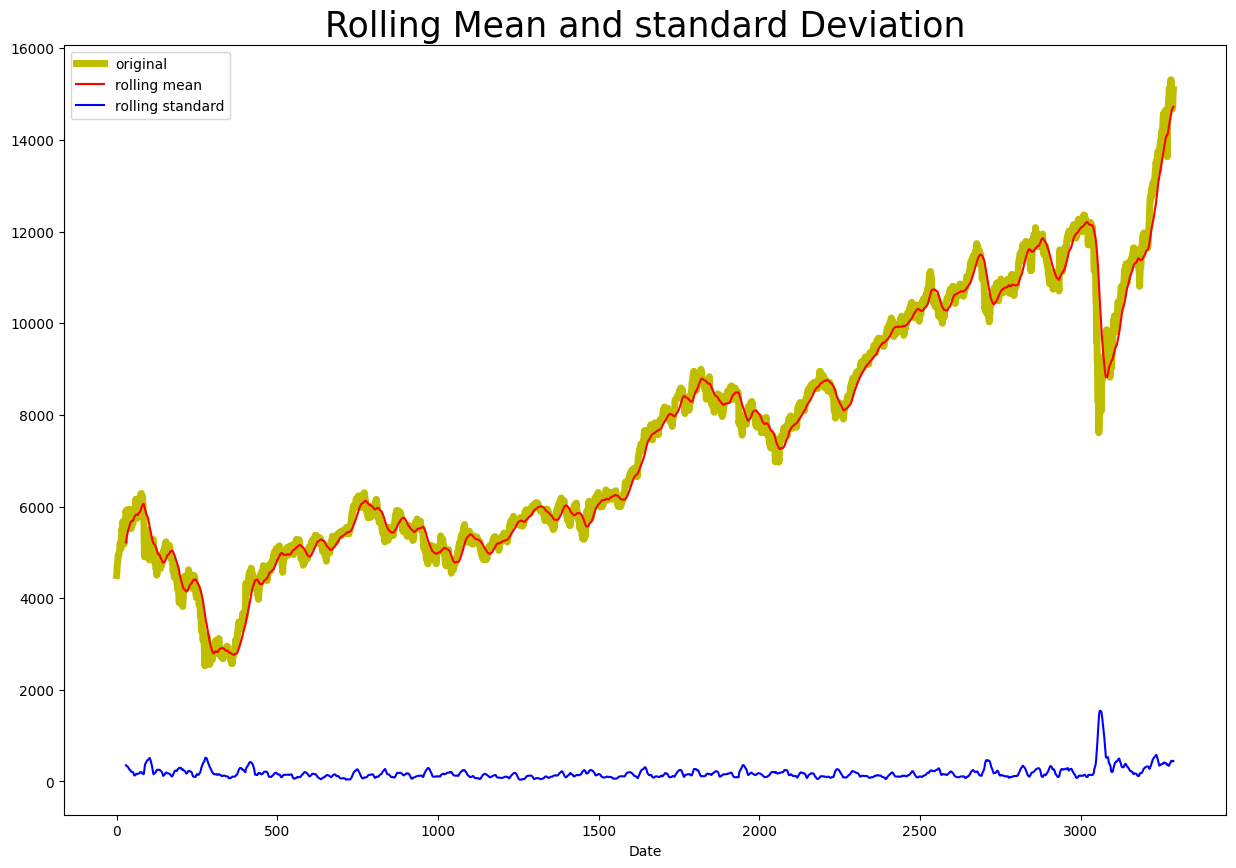

**************Result of Dickey Fuller Test***************
(0.49196431729512907, 0.9846268008991517, 12, 3277, {'1%': -3.4323470795742725, '5%': -2.8624223911394444, '10%': -2.5672397153452704}, 38753.945055133096)
ADF Test Statistics : 0.49196431729512907
p-value : 0.9846268008991517
#Lags Used : 12
Number of Onservation Used : 3277
Critical Value : {'1%': -3.4323470795742725, '5%': -2.8624223911394444, '10%': -2.5672397153452704}
Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary


In [154]:
print('************ NSE TRAIN CLOSE DATA *******************')
test_stationary(nse_train['Close'])

As per this test we can see the Time series is not stationary so we will transform the train data with log to test the stationary of time series

#### b. Log Transformation of NSE Train Close Data

For forecasting and economic analysis many variables are used in **logarithms (logs)**. In time series analysis, this transformation is often considered to stabilize the variance of a series.

We are applying log transformation in both train and test data of nse

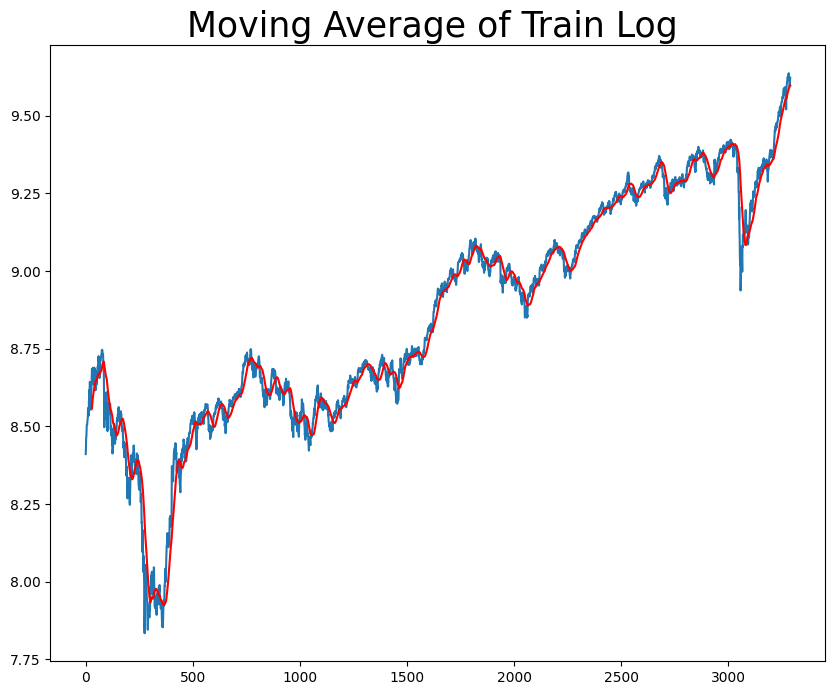

In [155]:
nse_train_log = np.log(nse_train['Close'])
nse_test_log = np.log(nse_test['Close'])

moving_avg_train = nse_train_log.rolling(30).mean()

plt.figure(figsize = (10,8))
plt.title('Moving Average of Train Log ',fontsize = 25)
plt.plot(nse_train_log)
plt.plot(moving_avg_train,color = 'red')

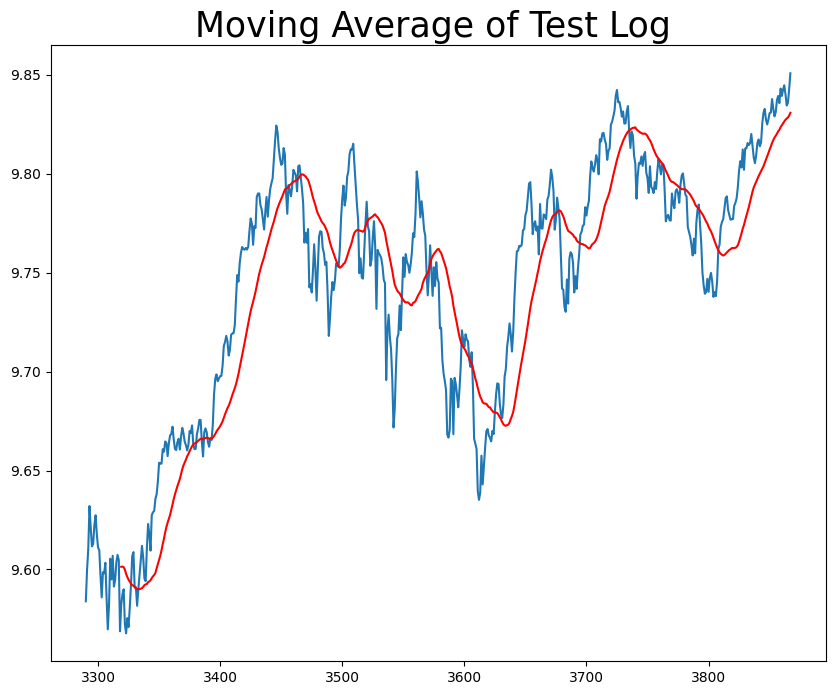

In [156]:
moving_avg_test = nse_test_log.rolling(30).mean()

plt.figure(figsize = (10,8))
plt.title('Moving Average of Test Log ',fontsize = 25)
plt.plot(nse_test_log)
plt.plot(moving_avg_test,color = 'red')

In [157]:
nse_train_log.isnull().sum()

0

In [158]:
nse_test_log.isnull().sum()

0

************* nse TRAIN LOG DATA **********


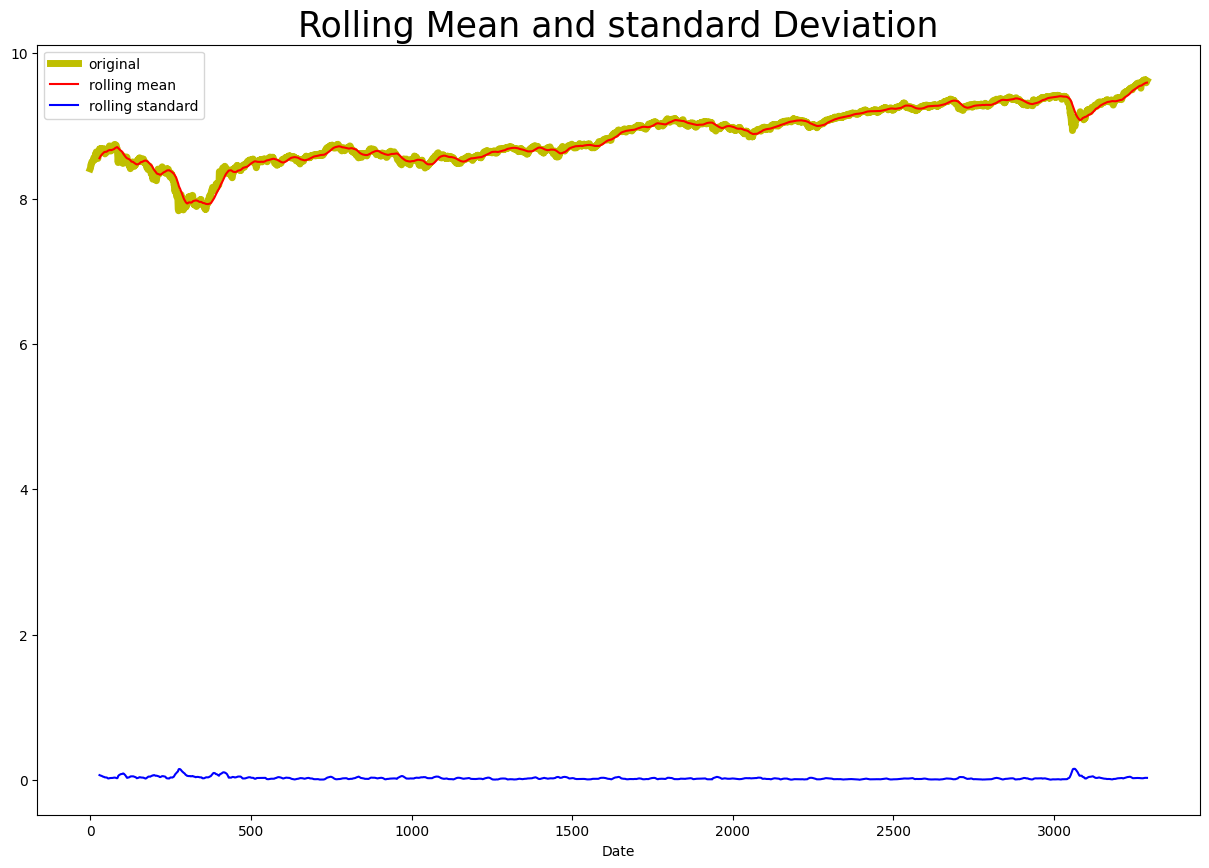

**************Result of Dickey Fuller Test***************
(-0.4419866751853451, 0.9028489689398431, 12, 3277, {'1%': -3.4323470795742725, '5%': -2.8624223911394444, '10%': -2.5672397153452704}, -18511.112215385117)
ADF Test Statistics : -0.4419866751853451
p-value : 0.9028489689398431
#Lags Used : 12
Number of Onservation Used : 3277
Critical Value : {'1%': -3.4323470795742725, '5%': -2.8624223911394444, '10%': -2.5672397153452704}
Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary


In [159]:
nse_train_log.dropna(inplace=True)
nse_test_log.dropna(inplace=True)

print('************* nse TRAIN LOG DATA **********')

test_stationary(nse_train_log)

************* nse TEST LOG DATA **********


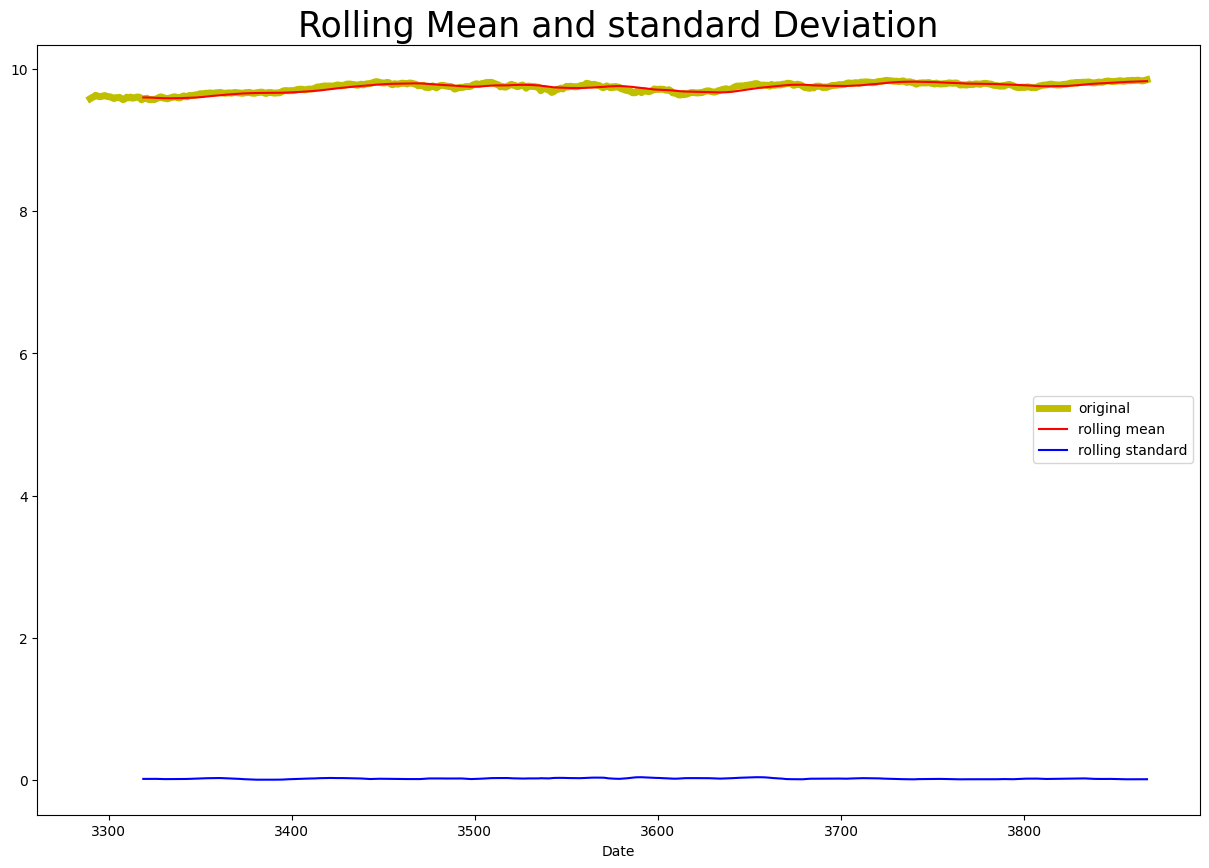

**************Result of Dickey Fuller Test***************
(-2.078971446460206, 0.2530539172920383, 0, 577, {'1%': -3.441734108219804, '5%': -2.8665621113012514, '10%': -2.5694446417404313}, -3638.319790604057)
ADF Test Statistics : -2.078971446460206
p-value : 0.2530539172920383
#Lags Used : 0
Number of Onservation Used : 577
Critical Value : {'1%': -3.441734108219804, '5%': -2.8665621113012514, '10%': -2.5694446417404313}
Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary


In [160]:
print('************* nse TEST LOG DATA **********')

test_stationary(nse_test_log)

As per Dicket Fuller Test for both train and test it failed to reject null hypothesis even after log transformation.

So we will create new data by the diference of train log and moving average of train data

#### c. Difference of NSE Train Close Log and Mobing average of NSE Train Close

In [208]:
nse_train_log_diff = nse_train_log - moving_avg_train

nse_train_log_diff.tail()

,Close
3285,0.021245
3286,-0.000149
3287,0.001526
3288,0.019053
3289,0.025526


In [162]:
nse_train_log_diff.isna().sum()

29

In [163]:
nse_train_log_diff.dropna(inplace=True)

In [210]:
nse_train_log_diff.sample(10)

,Close
2066,0.029837
906,-0.035807
2414,0.024533
1282,0.017599
941,0.009093
2931,-0.013298
1588,0.046682
2342,0.009205
1959,-0.012247
946,0.026754


******************Train Log Difference Data ****************


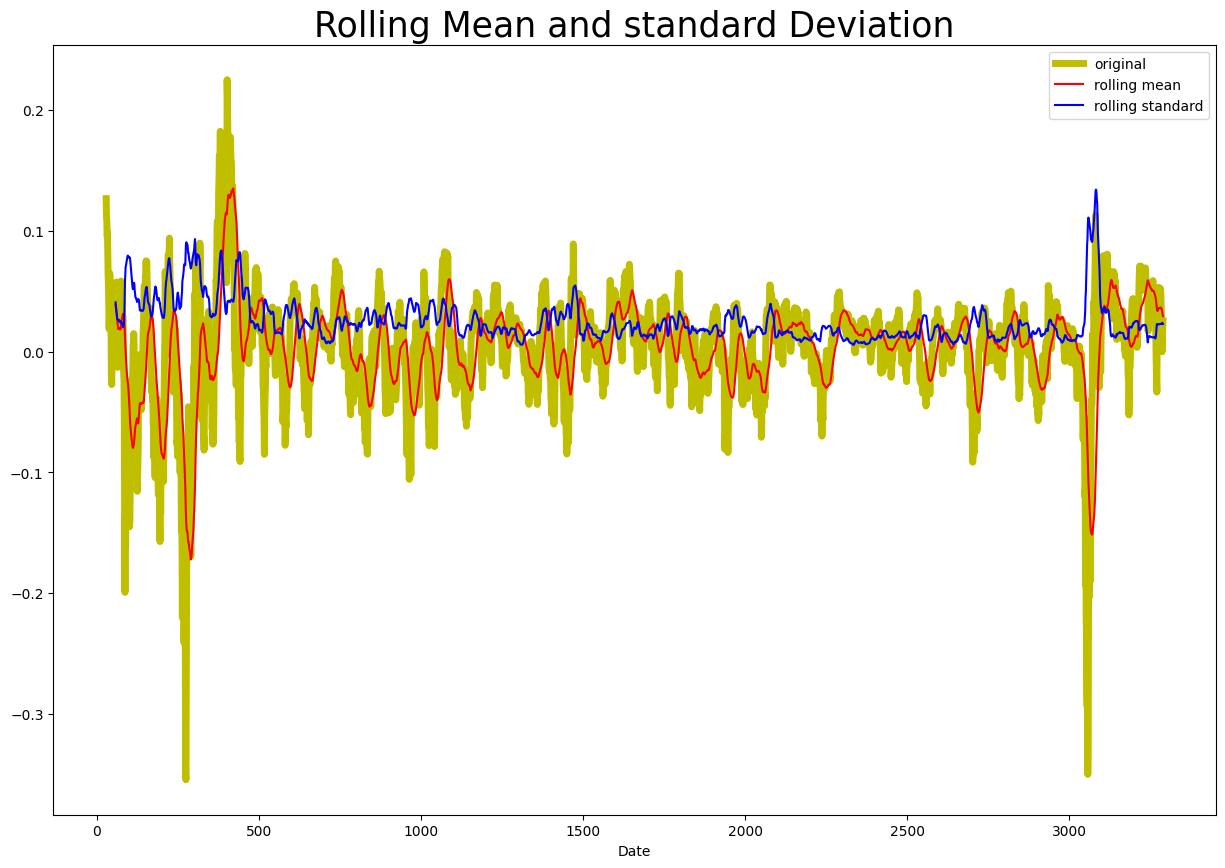

**************Result of Dickey Fuller Test***************
(-10.17337765056609, 6.99434508759439e-18, 17, 3243, {'1%': -3.432368033803368, '5%': -2.8624316464349073, '10%': -2.5672446426683}, -18561.65310204497)
ADF Test Statistics : -10.17337765056609
p-value : 6.99434508759439e-18
#Lags Used : 17
Number of Onservation Used : 3243
Critical Value : {'1%': -3.432368033803368, '5%': -2.8624316464349073, '10%': -2.5672446426683}
Reject the Null Hypothesis (Ho) test and the Time series is Stationary


In [165]:
print('******************Train Log Difference Data ****************')

test_stationary(nse_train_log_diff)

Here it rejects the null hypothesis and time series is stationary




### Step 4: Predicting the trainlog data by using AUTO ARIMA

> **Auto-Regressive Integrated Moving Average (ARIMA)** is a time series model that identifies hidden patterns in time series values and makes predictions.



In [166]:
nse_model = auto_arima(nse_train_log,trace=True,error_action = 'ignore',supress_warning = True)
nse_model.fit(nse_train_log)

nse_prediction = nse_model.predict(n_periods = len(nse_test))
nse_prediction = pd.DataFrame(nse_prediction,index=nse_test_log.index,columns = ['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-18591.301, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18592.479, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18597.488, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18597.557, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18592.303, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18595.578, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-18595.551, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-18594.261, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-18597.565, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-18595.579, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-18595.544, Time=0.49 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-18597.503, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-18594.127, Time=0.41 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.110 seco

In [167]:
nse_prediction.head()

,Prediction
3290,9.62259
3291,9.62259
3292,9.62259
3293,9.62259
3294,9.62259


Text(0, 0.5, 'Actual Stock Price')

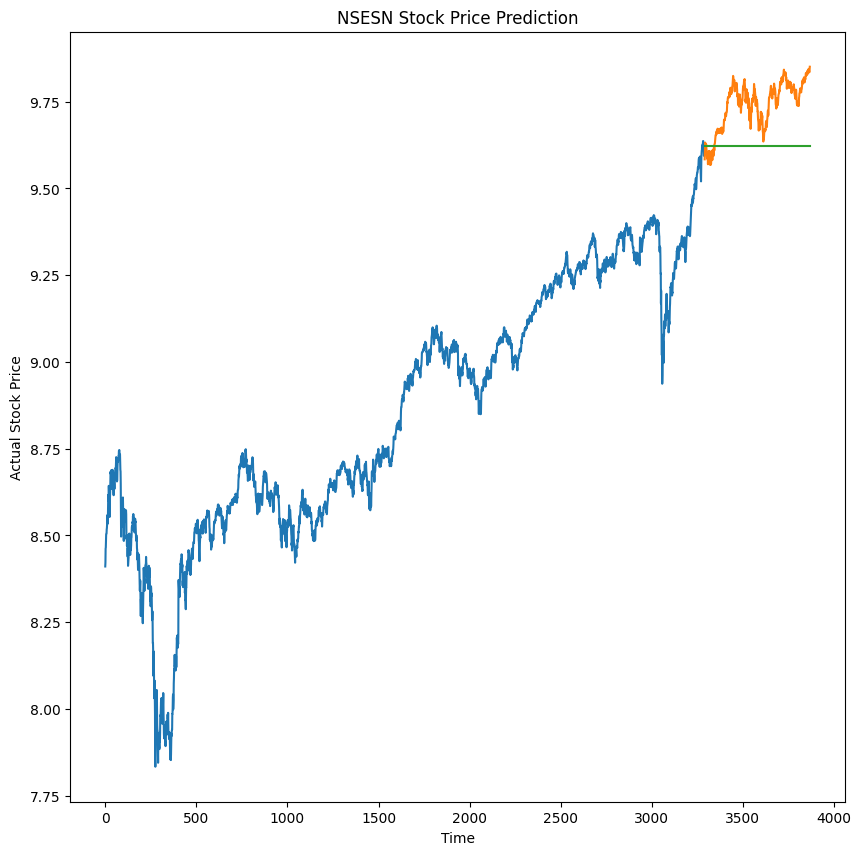

In [168]:

plt.plot(nse_train_log, label='Train')
plt.plot(nse_test_log, label='Test')
plt.plot(nse_prediction, label='Prediction')
plt.title('NSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')


Calculating error using root mean square error (RMSE) with test data and prediction data

In [169]:
nse_rms = np.sqrt(mean_squared_error(nse_test_log,nse_prediction))
print("Root Mean Square Error (RMSE) : ", nse_rms)

Root Mean Square Error (RMSE) :  0.1370002523339617


Here the RMSE is less and a low RMSE value indicates that the *simulated and onserved data are close to each other showing a better accuracy.*


# Part B : Textual and Sentimental Analysis for India News Data

### Step 1: Importing the data from KAGGLE

We are loading the India News Dataset directly from Kaggle site as we can see the news data from **1st Jan 2001 and 31st March 2022**.

Please refer this link for more info : https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

ONLY FOR GOOGLE COLAB : Please make sure to add the kaggle.json (API doenloaded from  Kaggle) on path mentioned in image before running the installation

image.png

In [44]:
#installing kaggle
! pip install kaggle


In [44]:
#making directory for kaggle path

! mkdir ~/.kaggle

In [45]:
#copy the kaggle.json file to kaggle path

! cp /kaggle.json ~/.kaggle/

In [46]:
#giving access for kaggle.json and file

! chmod 600 ~/.kaggle/kaggle.json

In [47]:
# Downloading dataset of India News Headline data from kaggle

! kaggle datasets download -d therohk/india-headlines-news-dataset

Dataset URL: https://www.kaggle.com/datasets/therohk/india-headlines-news-dataset
License(s): CC0-1.0
 93% 87.0M/93.1M [00:00<00:00, 199MB/s]
100% 93.1M/93.1M [00:00<00:00, 154MB/s]


In [48]:
#As the file is zipped so we need to unzip the file for easy access

! unzip india-headlines-news-dataset.zip

Archive:  india-headlines-news-dataset.zip
  inflating: india-news-headlines.csv  


### Step 2 : Loading the data

In [49]:
cols = ['Date','Category','News']
india_news_data = pd.read_csv('/content/india-news-headlines.csv', names = cols)
india_news_data.drop(0, inplace=True)
india_news_data.head()

,Date,Category,News
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic


In [50]:
# Formatting the data column with datetime format

india_news_data['Date'] = pd.to_datetime(india_news_data['Date'],format = '%Y%m%d')
india_news_data.head()

,Date,Category,News
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa
5,2001-01-02,unknown,Extra buses to clear tourist traffic


In [51]:
pd.set_option('display.max_rows', None)

In [53]:
round(((india_news_data['Category'].astype('category').value_counts()/len(india_news_data.index))*100),5)

,count
Category,
india,7.92897
unknown,5.40642
city.mumbai,4.33596
city.delhi,3.82401
city.hyderabad,3.42758
business.india-business,3.24773
city.chandigarh,3.14158
city.bengaluru,2.79534
city.ahmedabad,2.76810


In [54]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

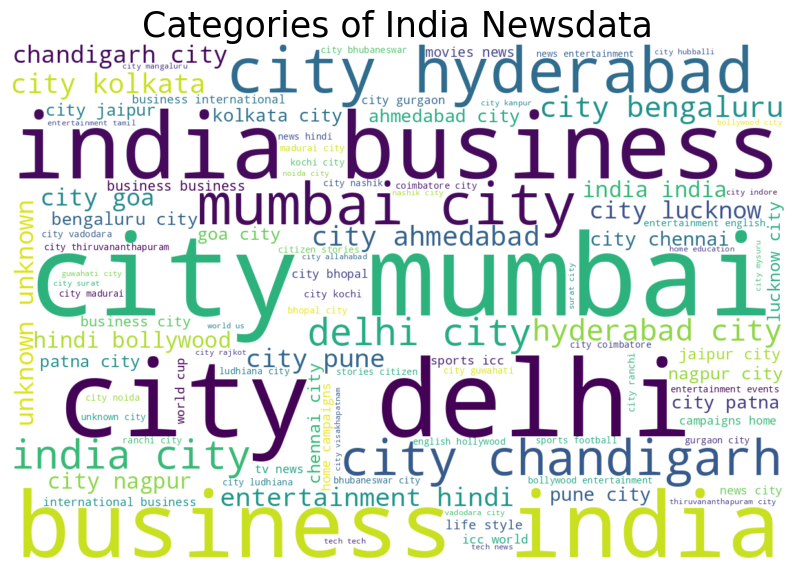

In [55]:
plt.rcParams['figure.figsize'] = (10, 10)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',
                      colormap='viridis',
                      max_words = 100,
                      stopwords = stopwords ,
                      width = 1200,
                      height = 800,
                     random_state = 30).generate(str(india_news_data['Category'].astype('category')))


plt.title('Categories of India Newsdata', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [56]:
india_news_data.drop('Category',axis  = 1 , inplace = True)
india_news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3876557 entries, 1 to 3876557
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   News    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 59.2+ MB


In [57]:
india_news_data.head()

,Date,News
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
5,2001-01-02,Extra buses to clear tourist traffic


In [58]:
india_news_data.shape

(3876557, 2)

### Step 3 : Transforming the data and deleting the duplicates of indian news headlines data

In [59]:
india_news_data['News'] = india_news_data.groupby(['Date']).transform(lambda x : ' '.join(x))

In [60]:
india_news_data = india_news_data.drop_duplicates()
india_news_data.reset_index(inplace = True, drop = True)
india_news_data.shape

(8170, 2)

In [61]:
india_news_data['News'].head(25)

,News
0,Status quo will not be disturbed at Ayodhya; s...
1,Powerless north India gropes in the dark Think...
2,The string that pulled Stephen Hawking to Indi...
3,Light combat craft takes India into club class...
4,Light combat craft takes India into club class...
5,Muslim body rules out talks on Ayodhya Bajrang...
6,Sangh Parivar; Babri panel up the ante Frontru...
7,Financier Bharat Shah held for alleged links w...
8,Fend for yourselves; Pande tells doctors Burea...
9,Sonia takes on the Hindutva brigade Congress h...


### Step 4 : Sentimental Analysis Using TextBlob

> TextBlob is a simple library which supports complex analysis and operations on textual data. For lexicon-based approaches, a sentiment is defined by its semantic orientation and the intensity of each word in the sentence. This requires a pre-defined dictionary classifying negative and positive words.



In [62]:
from textblob import TextBlob

We will analyse the india news headline using Polarity and **Subjectivity**

*   Polarity is the output that lies between [-1,1], **where -1 refers to negative sentiment and +1 refers to positive sentiment**.
*   Subjectivity is the output that lies within [0,1] and refers to **personal opinions and judgments.**

In [63]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [64]:
india_news_data['Subjectivity'] = india_news_data['News'].apply(getSubjectivity)
india_news_data['Polarity'] = india_news_data['News'].apply(getPolarity)
india_news_data.head(25)

,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
5,2001-01-07,Muslim body rules out talks on Ayodhya Bajrang...,0.365356,-0.060708
6,2001-01-08,Sangh Parivar; Babri panel up the ante Frontru...,0.414653,-0.019214
7,2001-01-09,Financier Bharat Shah held for alleged links w...,0.501934,-0.003837
8,2001-01-10,Fend for yourselves; Pande tells doctors Burea...,0.000000,0.000000
9,2001-01-23,Sonia takes on the Hindutva brigade Congress h...,0.293515,0.084455


<Axes: >

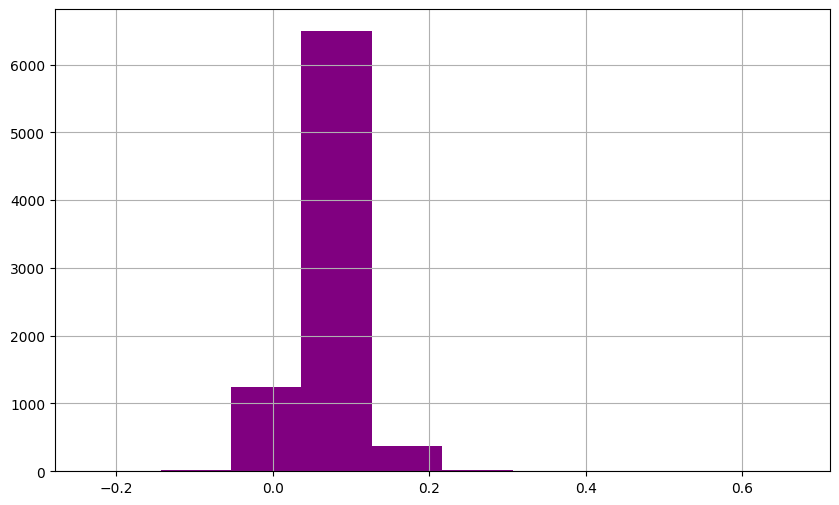

In [65]:
plt.figure(figsize = (10,6))
india_news_data['Polarity'].hist(color = 'purple')

<Axes: >

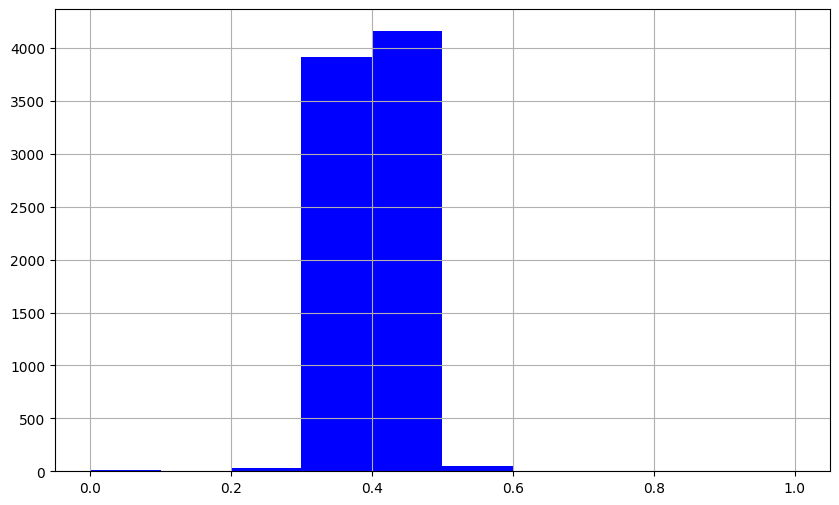

In [66]:

plt.figure(figsize = (10,6))
india_news_data['Subjectivity'].hist(color = 'blue')

### Step 5 : Sentiment Analysis using VADER i.e. **SentimentIntensityAnalyzer**

> **VADER ( Valence Aware Dictionary for Sentiment Reasoning)** is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.


In [67]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [68]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer as ps

In [214]:
sia = SentimentIntensityAnalyzer()

Polarity classification
The VADER library returns 4 values such as:

1.   pos: The probability of the sentiment to be positive
2.   neu: The probability of the sentiment to be neutral
3.   neg: The probability of the sentiment to be negative
4.   compound: The normalized compound score which calculates the sum of all lexicon ratings and takes values from -1 to 1

Typical threshold values are the following:

1. positive: compound score >= 0.05
2. neutral: compound score between -0.05 and 0.05
3. negative: compound score <= -0.05


In [70]:
#Wcalculating the compound and there threshold

india_news_data['Compound'] = [sia.polarity_scores(v)['compound'] for v in india_news_data['News']]
india_news_data['Negative'] = [sia.polarity_scores(v)['neg'] for v in india_news_data['News']]
india_news_data['Neutral'] = [sia.polarity_scores(v)['neu'] for v in india_news_data['News']]
india_news_data['Positive'] = [sia.polarity_scores(v)['pos'] for v in india_news_data['News']]
india_news_data.head(25)

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
5,2001-01-07,Muslim body rules out talks on Ayodhya Bajrang...,0.365356,-0.060708,-0.9944,0.131,0.848,0.021
6,2001-01-08,Sangh Parivar; Babri panel up the ante Frontru...,0.414653,-0.019214,-0.9779,0.121,0.812,0.066
7,2001-01-09,Financier Bharat Shah held for alleged links w...,0.501934,-0.003837,-0.9948,0.138,0.809,0.053
8,2001-01-10,Fend for yourselves; Pande tells doctors Burea...,0.000000,0.000000,-0.7096,0.277,0.723,0.000
9,2001-01-23,Sonia takes on the Hindutva brigade Congress h...,0.293515,0.084455,0.9152,0.054,0.852,0.094


### Step 6 : Plotting graph for sentiment Analysis

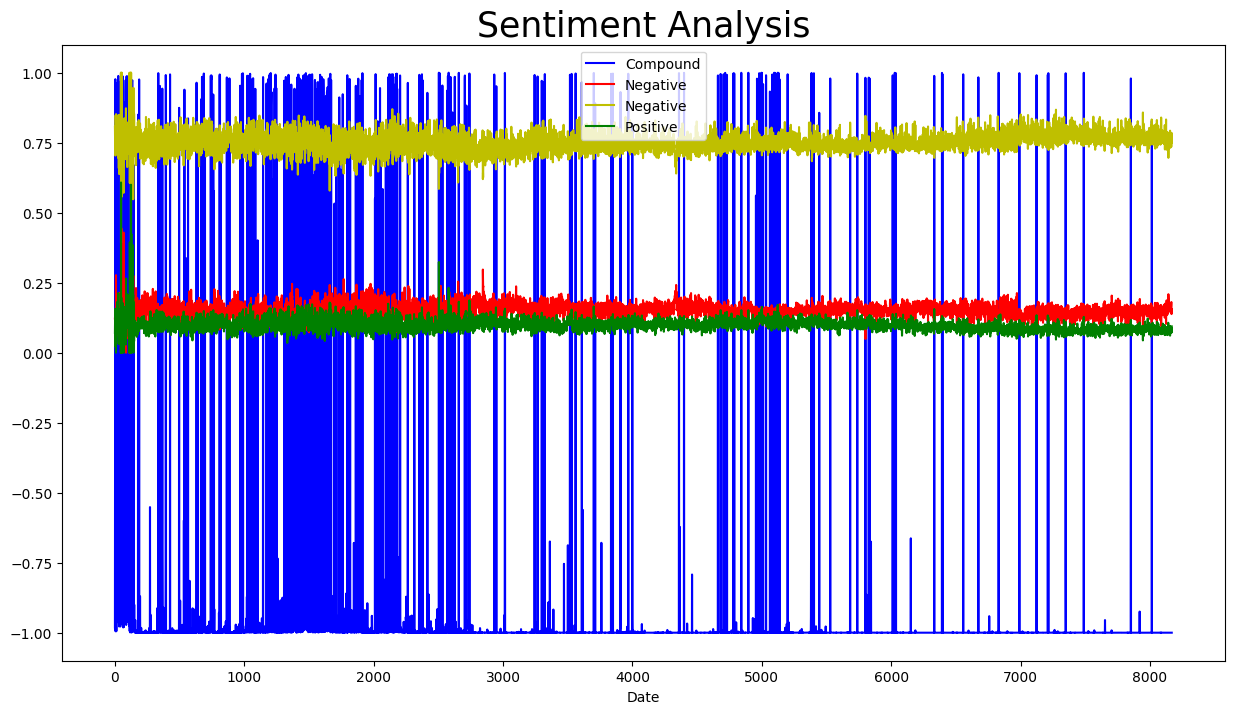

In [71]:
  plt.figure(figsize = (15,8))
  plt.plot(india_news_data['Compound'],color = 'b',label = 'Compound')
  plt.plot(india_news_data['Negative'],color='r',label = 'Negative')
  plt.plot(india_news_data['Neutral'],color = 'y',label = 'Negative')
  plt.plot(india_news_data['Positive'],color = 'g',label = 'Positive')
  plt.xlabel('Date')
  plt.legend()
  plt.title('Sentiment Analysis',fontsize = 25)
  #plt.title(timeseries)
  plt.show(block = False)


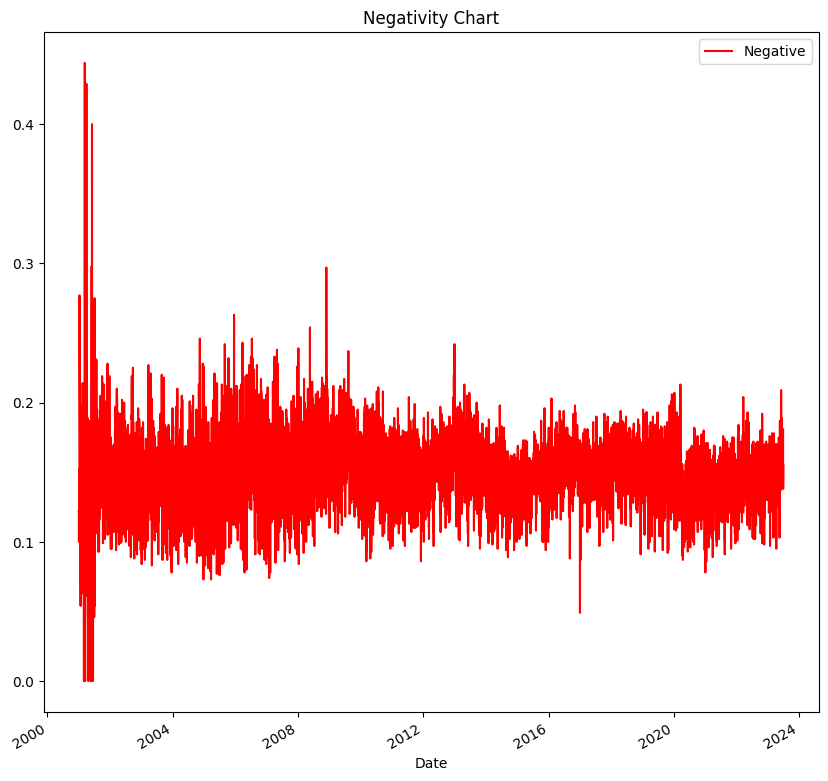

In [72]:

india_news_data.plot(x='Date',
             y='Negative',
             color = 'red',
             title='Negativity Chart');

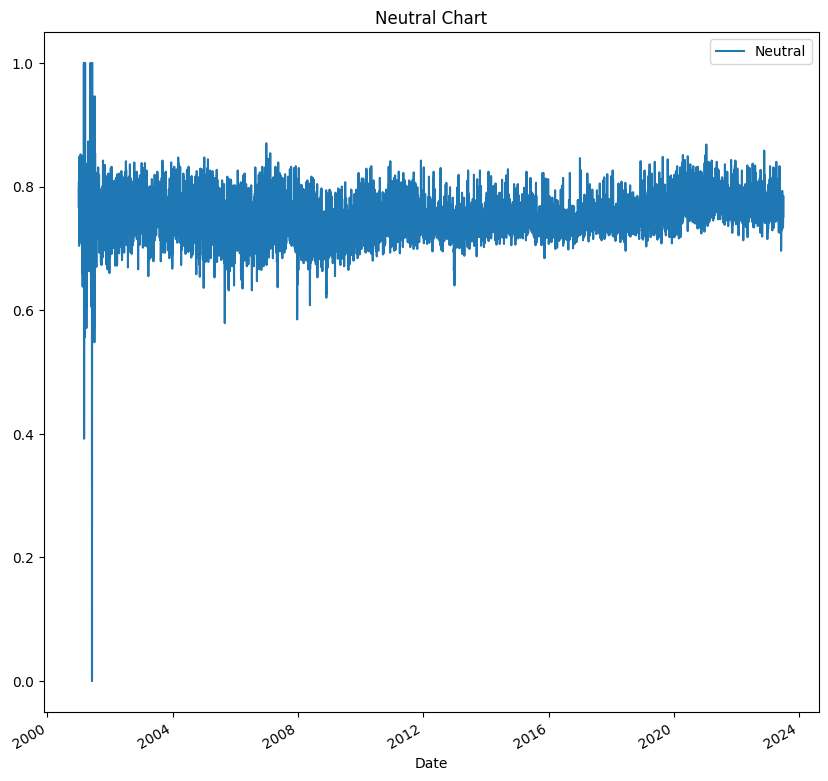

In [73]:

india_news_data.plot(x='Date',
             y='Neutral',
             title='Neutral Chart');

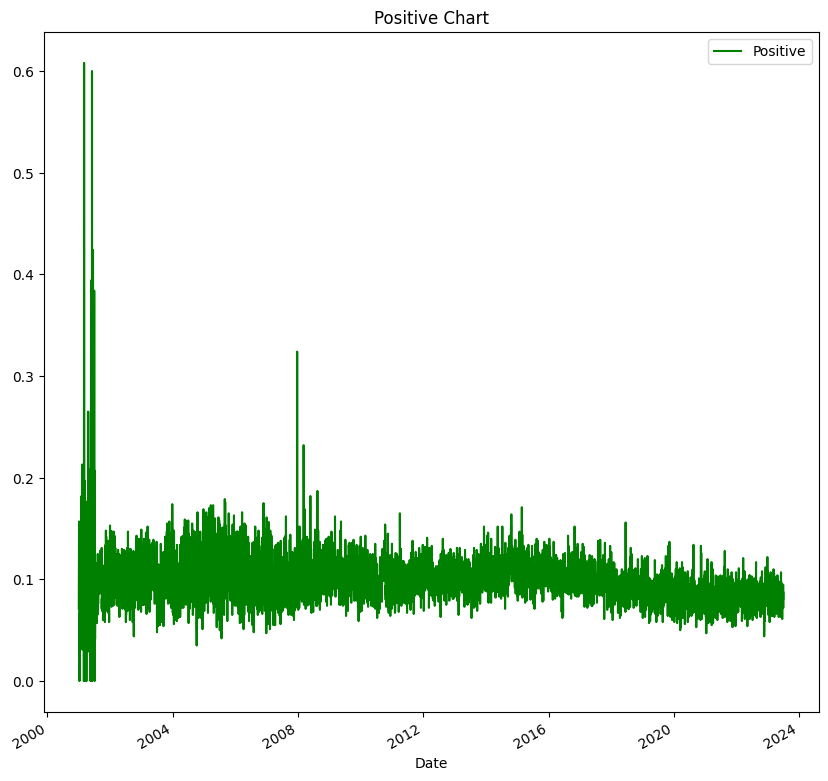

In [74]:

india_news_data.plot(x='Date',
             y='Positive',
             color = 'green',
             title='Positive Chart');

We can say that the headlines having more negative indication

# Part C : Merging Stock Market data with India News Data

> For final anaysis of Numerical and Textual Analysis we are merging the Stock Exchange data with India News Headline Data



### Step 1 : Merging the Stock Exchange data with India News Data

In [170]:
nse_news_analysis = pd.merge(nse_data,india_news_data,how = 'inner',on='Date')

In [171]:
nse_news_analysis.head()

,Date,Close,High,Low,Open,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0,Men are painting it pink Bipasha's twins! Come...,0.352905,0.069195,-0.9988,0.139,0.778,0.084
1,2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0,Reel bonhomie It's all about having fun togeth...,0.446300,0.084581,-0.9991,0.147,0.766,0.087
2,2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0,Dressed to thrill? Not reely I am a very posit...,0.483904,0.164237,-0.9979,0.130,0.785,0.085
3,2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0,Hey juniors! Are you ready to rock? Saawariya'...,0.387699,0.077357,-0.9971,0.137,0.771,0.092
4,2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0,Yoga for face Priyanka Chopra tears abs muscle...,0.434930,0.023527,-0.9992,0.158,0.768,0.074


In [172]:
nse_news_analysis.shape

(3865, 13)

In [173]:
nse_news_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3865 non-null   datetime64[ns]
 1   Close         3865 non-null   float64       
 2   High          3865 non-null   float64       
 3   Low           3865 non-null   float64       
 4   Open          3865 non-null   float64       
 5   Volume        3865 non-null   int64         
 6   News          3865 non-null   object        
 7   Subjectivity  3865 non-null   float64       
 8   Polarity      3865 non-null   float64       
 9   Compound      3865 non-null   float64       
 10  Negative      3865 non-null   float64       
 11  Neutral       3865 non-null   float64       
 12  Positive      3865 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 392.7+ KB


In [174]:
analysis = nse_news_analysis[['Close','Subjectivity','Polarity','Compound','Negative','Neutral','Positive']]
analysis.sample(10)

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1165,5165.000000,0.371647,0.020213,-1.0000,0.177,0.733,0.090
1179,5306.299805,0.433231,0.048323,-0.9999,0.156,0.746,0.098
2179,8632.599609,0.413851,0.047666,-1.0000,0.176,0.739,0.085
2668,11355.750000,0.399339,0.072354,-0.9999,0.144,0.758,0.098
344,2893.050049,0.408366,0.055659,-0.9998,0.161,0.733,0.107
1722,7945.549805,0.437111,0.093406,-0.9992,0.139,0.734,0.127
596,5017.000000,0.406618,0.032138,-0.9995,0.196,0.693,0.112
1457,5471.799805,0.402353,0.048689,-0.9999,0.148,0.761,0.090
3582,16411.250000,0.345100,0.022328,-0.9999,0.166,0.753,0.081
2018,7861.049805,0.430927,0.064812,-0.9990,0.124,0.768,0.108


In [175]:
analysis.shape

(3865, 7)

### Step 2 : Training the model using Min Max Scaler

In [176]:
from sklearn.preprocessing import MinMaxScaler

In [177]:
analysis_scaler = MinMaxScaler()
scaler_df = pd.DataFrame(analysis_scaler.fit_transform(analysis))
scaler_df.columns = analysis.columns
scaler_df.index = analysis.index


In [178]:
scaler_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.119799,0.276319,0.441548,0.00060,0.317919,0.653846,0.200000
1,0.122934,0.721544,0.514962,0.00045,0.364162,0.607692,0.216216
2,0.134251,0.900804,0.895049,0.00105,0.265896,0.680769,0.205405
3,0.135175,0.442187,0.480495,0.00145,0.306358,0.626923,0.243243
4,0.140647,0.667340,0.223636,0.00040,0.427746,0.615385,0.145946


In [179]:
X = scaler_df.drop('Close',axis = 1)
y = scaler_df['Close']

In [180]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.276319,0.441548,0.00060,0.317919,0.653846,0.200000
1,0.721544,0.514962,0.00045,0.364162,0.607692,0.216216
2,0.900804,0.895049,0.00105,0.265896,0.680769,0.205405
3,0.442187,0.480495,0.00145,0.306358,0.626923,0.243243
4,0.667340,0.223636,0.00040,0.427746,0.615385,0.145946


In [181]:
y.head()

,Close
0,0.119799
1,0.122934
2,0.134251
3,0.135175
4,0.140647


Train and Test using 70:30 model

In [182]:
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [183]:
X_train.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
3827,0.527821,0.279070,0.00005,0.526012,0.453846,0.275676
516,0.581612,0.666586,0.00020,0.341040,0.573077,0.286486
702,0.376086,0.683566,0.00025,0.346821,0.557692,0.302703
2762,0.496748,0.465573,0.00005,0.456647,0.573077,0.178378
406,0.365568,0.359839,0.00020,0.398844,0.473077,0.378378


In [184]:
X_train.shape

(2705, 6)

In [185]:
X_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
3827,0.527821,0.279070,0.00005,0.526012,0.453846,0.275676
516,0.581612,0.666586,0.00020,0.341040,0.573077,0.286486
702,0.376086,0.683566,0.00025,0.346821,0.557692,0.302703
2762,0.496748,0.465573,0.00005,0.456647,0.573077,0.178378
406,0.365568,0.359839,0.00020,0.398844,0.473077,0.378378
3548,0.393431,0.258447,0.00005,0.416185,0.650000,0.108108
652,0.595470,0.701686,0.00070,0.445087,0.411538,0.421622
1902,0.462693,0.598328,0.00005,0.358382,0.553846,0.297297
3850,0.567461,0.136413,0.00000,0.606936,0.465385,0.189189
1110,0.584957,0.383057,0.00010,0.346821,0.611538,0.227027


### Step 3 : Predicting the model

#### a. Random Forest Regressor

In [186]:
analysis_rf = RandomForestRegressor()
analysis_rf.fit(X_train,y_train)
prediction_rf = analysis_rf.predict(X_test)

In [187]:
print("Prediction : ",+prediction_rf[:10])

Prediction :  [0.65284452 0.34215612 0.15369735 0.15738201 0.26338645 0.4063321
 0.40572519 0.26640162 0.18968003 0.17662775]


In [188]:
print(y_test[:10])

2126    0.345141
1276    0.205692
298     0.008041
465     0.126509
1281    0.204002
2398    0.447930
2644    0.512105
1495    0.217469
587     0.141754
3042    0.527578
Name: Close, dtype: float64


In [189]:
print("*********** Random Forest Regressor **************")
print("Mean Square Error : ")
print(mean_squared_error(prediction_rf,y_test))
print("R2 Square : ")
print(r2_score(prediction_rf,y_test) )
print("Mean Absolute Error : ")
print(mean_absolute_error(prediction_rf,y_test), end='\n')
print("Root Mean Square Error : ")
print(np.sqrt(mean_squared_error(prediction_rf,y_test)))

*********** Random Forest Regressor **************
Mean Square Error : 
0.0400843232039363
R2 Square : 
-0.2028373655328588
Mean Absolute Error : 
0.14634215788848534
Root Mean Square Error : 
0.20021069702674807


#### b. AdaBoost Regressor

In [190]:
from sklearn.ensemble import AdaBoostRegressor

In [191]:
analysis_adb = AdaBoostRegressor()
analysis_adb.fit(X_train,y_train)
predictions_adb = analysis_adb.predict(X_test)

In [192]:

print("*********** AdaBoostRegressor **************")
print("Mean Square Error : ")
print(mean_squared_error(predictions_adb,y_test))
print("R2 Square : ")
print(r2_score(predictions_adb,y_test) )
print("Mean Absolute Error : ")
print(mean_absolute_error(predictions_adb,y_test), end='\n')
print("Root Mean Square Error : ")
print(np.sqrt(mean_squared_error(predictions_adb,y_test)))

*********** AdaBoostRegressor **************
Mean Square Error : 
0.04451603725981569
R2 Square : 
-1.4220993874613828
Mean Absolute Error : 
0.1693318849621294
Root Mean Square Error : 
0.21098823962442953


#### c. Decision Tree Regressor

In [193]:
from sklearn.tree import DecisionTreeRegressor
analysis_dec_tree = DecisionTreeRegressor()
analysis_dec_tree.fit(X_train, y_train)
predictions_dec_tree = analysis_dec_tree.predict(X_test)

In [194]:
print("*********** Decision Tree Regressor **************")
print("Mean Square Error : ")
print(mean_squared_error(predictions_dec_tree,y_test))
print("R2 Square : ")
print(r2_score(predictions_dec_tree,y_test) )
print("Mean Absolute Error : ")
print(mean_absolute_error(predictions_dec_tree,y_test), end='\n')
print("Root Mean Square Error : ")
print(np.sqrt(mean_squared_error(predictions_dec_tree,y_test)))

*********** Decision Tree Regressor **************
Mean Square Error : 
0.07200227922583556
R2 Square : 
-0.045849312633373884
Mean Absolute Error : 
0.18867653227068057
Root Mean Square Error : 
0.2683324043529509


#### d. Light GBM Regressor

In [195]:
!pip install lightgbm

In [196]:
import lightgbm as lgb

In [197]:
analysis_lgb = lgb.LGBMRegressor()

In [198]:
analysis_lgb.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 2705, number of used features: 6
[LightGBM] [Info] Start training from score 0.391035


LGBMRegressor()

In [199]:
predictions_lgb = analysis_lgb.predict(X_test)


In [200]:
print("*********** Light GBM Regressor **************")
print("Mean Square Error : ")
print(mean_squared_error(predictions_lgb,y_test))
print("R2 Square : ")
print(r2_score(predictions_lgb,y_test) )
print("Mean Absolute Error : ")
print(mean_absolute_error(predictions_lgb,y_test), end='\n')
print("Root Mean Square Error : ")
print(np.sqrt(mean_squared_error(predictions_lgb,y_test)))

*********** Light GBM Regressor **************
Mean Square Error : 
0.039479885882997064
R2 Square : 
-0.13464640822838803
Mean Absolute Error : 
0.14626664722754892
Root Mean Square Error : 
0.198695460146922


#### e. XGBoost Regressor

In [201]:
import xgboost as xgb

In [202]:
analysis_xgb = xgb.XGBRegressor()

In [203]:
analysis_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [204]:
predictions_xgb = analysis_xgb.predict(X_test)

In [205]:
print("*********** XGBoost Regressor **************")
print("Mean Square Error : ")
print(mean_squared_error(predictions_xgb,y_test))
print("R2 Square : ")
print(r2_score(predictions_xgb,y_test) )
print("Mean Absolute Error : ")
print(mean_absolute_error(predictions_xgb,y_test), end='\n')
print("Root Mean Square Error : ")
print(np.sqrt(mean_squared_error(predictions_xgb,y_test)))

*********** XGBoost Regressor **************
Mean Square Error : 
0.0446543082210078
R2 Square : 
-0.12713808779679425
Mean Absolute Error : 
0.1553864636790769
Root Mean Square Error : 
0.2113156601414287


### Conclusion

As per Mean Square Error


1.   **Random Forest Regressor :** 0.0400843232039363
1.   **AdaBoost Regressor :** 0.04451603725981569
2.   **Decision Tree Regressor :**  0.07200227922583556
2.   **Light GBM Regressor :**  0.039479885882997064
1.   **XGBoost Regressor :** 0.0446543082210078








```
# This is formatted as code
```

# **Conclusion: With the lowest MSE, LightGBM Model produces better prediction accuracy**